In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Model processing

In [ ]:
# Imports
import seaborn as sns
import csv
import pandas as pd
import string

import numpy as np
import matplotlib.pyplot as plt
import pprint
import datetime
import glob
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, explained_variance_score

from sklearn.linear_model import LassoCV, Lasso
from sklearn.metrics import mean_squared_log_error

In [ ]:
data_dir_csv = '/content/drive/MyDrive/311Colab/311_calls/311_csv/'

In [ ]:
meta_311 = pd.read_csv(data_dir_csv + 'meta_311.csv', index_col=0)

In [ ]:
meta_311.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2567581 entries, 2 to 163838
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   DUE            int64  
 1   OVERDUE        float64
 2   NEIGHBORHOOD   float64
 3   DEPARTMENT     float64
 4   DIVISION       float64
 5   QUEUE          float64
 6   Channel Type   float64
 7   Zip            float64
 8   scd_day_cos    float64
 9   scd_month_sin  float64
 10  scd_month_cos  float64
dtypes: float64(10), int64(1)
memory usage: 235.1 MB


In [ ]:
meta_311.head(5)

,DUE,OVERDUE,NEIGHBORHOOD,DEPARTMENT,DIVISION,QUEUE,Channel Type,Zip,scd_day_cos,scd_month_sin,scd_month_cos
2,0,-14.99,-1.093571,-0.315375,-0.427605,-0.240001,0.264298,-1.267736,0.625411,-0.5,0.866025
3,0,-14.99,-1.093571,-0.315375,-0.427605,-0.240001,0.264298,-1.267736,0.625411,-0.5,0.866025
5,0,-158.39,-1.093571,-0.315375,-0.427605,-0.240001,0.264298,-1.267736,0.625411,-0.5,0.866025
10,1,48.47,-0.395136,-0.102750,0.507442,-0.057630,0.264298,-0.684736,0.625411,-0.5,0.866025
12,0,-2.79,1.479609,0.747748,-1.362653,0.567639,0.264298,-0.408579,0.625411,-0.5,0.866025


## split data into train/valid/test


In [ ]:
X_vals = meta_311.drop(['DUE','OVERDUE'], axis=1)

# values as 0/1: 0 -> Not overdue   1 -> overdue
y_vals_class = meta_311[['DUE']]

# actual values for overdue
y_vals_reg = meta_311[['OVERDUE']]


In [ ]:
# Regression- split dataset into validation set and testing sets (50% each)
X_train_reg, X_valtest, y_train_reg, y_valtest = train_test_split(X_vals, y_vals_reg, test_size=0.3, random_state=20)
X_valid_reg, X_test_reg, y_valid_reg, y_test_reg = train_test_split(X_valtest, y_valtest, test_size=0.25, random_state=42)

# Classification split dataset into validation set and testing sets (50% each)
X_train_class, X_valtest, y_train_class, y_valtest = train_test_split(X_vals, y_vals_class, test_size=0.3, random_state=20, stratify=y_vals_class)
X_valid_class, X_test_class, y_valid_class, y_test_class = train_test_split(X_valtest, y_valtest, test_size=0.25, random_state=42, stratify=y_valtest)


In [ ]:
print("Classification Data")
print("training shape", X_train_class.shape, y_train_class.shape)
print("Validation shape", X_valid_class.shape, y_valid_class.shape)
print("Test shape", X_test_class.shape, y_test_class.shape)
print()
print("Regression Data")
print("training shape", X_train_reg.shape, y_train_reg.shape)
print("Validation shape", X_valid_reg.shape, y_valid_reg.shape)
print("Test shape", X_test_reg.shape, y_test_reg.shape)

Classification Data
training shape (1797306, 9) (1797306, 1)
Validation shape (577706, 9) (577706, 1)
Test shape (192569, 9) (192569, 1)

Regression Data
training shape (1797306, 9) (1797306, 1)
Validation shape (577706, 9) (577706, 1)
Test shape (192569, 9) (192569, 1)


In [ ]:
#y values Data need to be ravel --> (-1,)
y_train_reg = np.array(y_train_reg.values.tolist()).ravel()
y_valid_reg = np.array(y_valid_reg.values.tolist()).ravel()
y_test_reg = np.array(y_test_reg.values.tolist()).ravel()

y_train_class = np.array(y_train_class.values.tolist()).ravel()
y_valid_class = np.array(y_valid_class.values.tolist()).ravel()
y_test_class = np.array(y_test_class.values.tolist()).ravel()

# Supervised Learning Algorithm
## Lasso Regression with Regularization (L1 penalty)

In [ ]:
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import r2_score
from numpy import arange

In [ ]:
# The best model is selected by cross-validation
# define model evaluation method
cv = RepeatedKFold(n_splits=50, n_repeats=15, random_state=13)
lasso_cv_model = LassoCV(n_alphas=500, cv=cv, n_jobs=-1)
lasso_cv_model.fit(X_train_reg, y_train_reg)

LassoCV(cv=RepeatedKFold(n_repeats=15, n_splits=50, random_state=13),
        n_alphas=500, n_jobs=-1)

In [ ]:
alpha = lasso_cv_model.alpha_
print("The optimal value of alpha for Lasso Regression is: ", alpha)


The optimal value of alpha for Lasso Regression is:  0.01356531105894046


In [ ]:
# predict
y_pred_lasso = lasso_cv_model.predict(X_valid_reg)

In [ ]:
# evaluation metrics
MAE_Lasso = mean_absolute_error(y_valid_reg, y_pred_lasso)
MSE_Lasso = mean_squared_error(y_valid_reg, y_pred_lasso)
RMSE_Lasso = np.sqrt(MSE_Lasso)

# displacy metric results for valid dataset
pd.DataFrame([MAE_Lasso, MSE_Lasso, RMSE_Lasso], index=['MAE', 'MSE', 'RMSE'], columns=['Lasso Metrics'])

,Lasso Metrics
MAE,29.018694
MSE,3415.336051
RMSE,58.440877


Mean Absolute Error (MAE)
* ideal = 0 (Perfect)
* the lower the value for the MAE the better a model is able to fit a dataset.



MSE

*   the average squared distance between the observed and predicted values
*   Only a perfect model with no error produces an MSE of zero

<br>

RMSE

*   the standard deviation of the residuals (prediction errors)
*   measure of how spread out these residuals

<br>


In [ ]:
# use tune model to fit on valid data
lasso_cv_tune = Lasso(alpha=alpha, random_state=15)
lasso_cv_tune.fit(X_valid_reg, y_valid_reg)

Lasso(alpha=0.01356531105894046, random_state=15)

In [ ]:
# display coefficients
List_lasso_cv_model_coef=[]
List_lasso_cv_model_coef=lasso_cv_tune.coef_
print("total coefficients : ", len(lasso_cv_tune.coef_))
print(lasso_cv_tune.coef_)


total coefficients :  9
[-0.06992812  9.4767229  -3.46470355  5.27214092 -0.14939833  0.17536061
  3.02830975  0.6729148  -0.        ]


In [ ]:
# find amount of coefficients used after all
count = 0
index_val = -1
index_list=[]
for i in List_lasso_cv_model_coef:
  index_val+=1
  if i!=0:
    count+=1
  if i==0:
    index_list.append(index_val)

print("After Lasso Regression, we have only ", count, " none-zero coefficients")
print("drop indexes:", index_list)

After Lasso Regression, we have only  8  none-zero coefficients
drop indexes: [8]


In [ ]:
# predict
y_pred_lasso = lasso_cv_tune.predict(X_test_reg)
y_pred_lasso

array([-1.78999780e+00, -1.69427316e+01, -2.22183768e+01, ...,
       -1.52846256e-02,  2.86432887e+00, -1.42062297e+01])

In [ ]:
y_test_reg[5:]

array([-19.  , -29.97, -24.84, ...,  -8.97,   4.96, -26.92])

In [ ]:
# evaluation metrics
MAE_Lasso = mean_absolute_error(y_test_reg, y_pred_lasso)
MSE_Lasso = mean_squared_error(y_test_reg, y_pred_lasso)
RMSE_Lasso = np.sqrt(MSE_Lasso)


In [ ]:
# displacy metric results for test dataset
pd.DataFrame([MAE_Lasso, MSE_Lasso, RMSE_Lasso], index=['MAE', 'MSE', 'RMSE'], columns=['Lasso Metrics'])

,Lasso Metrics
MAE,29.048990
MSE,3427.895175
RMSE,58.548229


# Classification Algorithm
##  Gaussian Naive Bayes





In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train_class, y_train_class)


GaussianNB()

In [ ]:
y_pred = gnb.predict(X_valid_class)

In [ ]:
print("Number of mislabeled points out of a total %d points : %d"
% (X_test_class.shape[0], (y_valid_class != y_pred).sum()))

Number of mislabeled points out of a total 192569 points : 119923


In [ ]:
#print the scores on training and valid set

print('Training set score: {:.4f}'.format(gnb.score(X_train_class, y_train_class)*100))

print('Valid set score: {:.4f}'.format(gnb.score(X_valid_class, y_valid_class)*100))

Training set score: 79.2445
Valid set score: 79.2415


The training-set accuracy score is 79.2445 while the valid-set accuracy to be 79.2415. These two values are quite comparable. So, there is no sign of overfitting.

In [ ]:
# confusion matrix
cm = confusion_matrix(y_valid_class, y_pred)
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])
# TN  FP
# FN  TP

Confusion matrix

 [[451490   7829]
 [112094   6293]]

True Positives(TP) =  451490

True Negatives(TN) =  6293

False Positives(FP) =  7829

False Negatives(FN) =  112094


The confusion matrix shows


True Positives (Actual Positive:1 and Predict Positive:1) -  <br>
True Negatives (Actual Negative:0 and Predict Negative:0) -  <br>
False Positives (Actual Negative:0 but Predict Positive:1) -  (Type I error) <br>
False Negatives (Actual Positive:1 but Predict Negative:0) -  (Type II error) <br>

In [ ]:
# classification report
print("Before Tuning")
print(classification_report(y_valid_class, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.98      0.88    459319
           1       0.45      0.05      0.09    118387

    accuracy                           0.79    577706
   macro avg       0.62      0.52      0.49    577706
weighted avg       0.73      0.79      0.72    577706



Precision
* can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes.
* It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

* Precision identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.

Recall
* can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes.
* It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). Recall is also called Sensitivity.

F1-score
* the weighted harmonic mean of precision and recall.
* The best possible f1-score would be 1.0 and the worst would be 0.0.
* f1-score is the harmonic mean of precision and recall.
* f1-score is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of f1-score should be used to compare classifier models, not global accuracy.

Support
* the actual number of occurrences of the class in our dataset.

In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7924


In [ ]:
# classification error
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2076


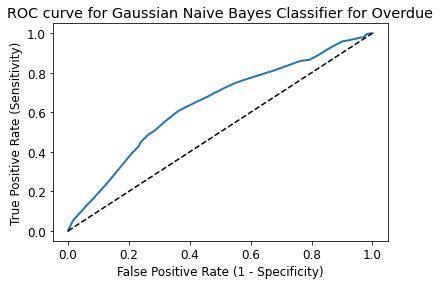

In [ ]:
# store the predicted probabilities for class 1 - overdue
y_pred1 = gnb.predict_proba(X_valid_class)[:, 1]

fpr, tpr, thresholds = roc_curve(y_valid_class, y_pred1)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Overdue')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [ ]:
auc_score = roc_auc_score(y_valid_class, y_pred1)

print('ROC AUC : {:.4f}'.format(auc_score))

ROC AUC : 0.6398


Interpretation

ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does not do a good job in predicting whether it will be overdue or not.

In [ ]:
scores = cross_val_score(gnb, X_train_class, y_train_class, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.79292943 0.79244538 0.79113787 0.79251214 0.79307966 0.79338567
 0.79239415 0.79258332 0.79074167 0.79281144]


In [ ]:
# compute Average cross-validation score

print('Average cross-validation score: {:.2f}'.format(scores.mean()*100))

Average cross-validation score: 79.24


Interpretation
Using the mean cross-validation, we can conclude that we expect the model to be around 79.24% accurate on average.

If we look at all the 10 scores produced by the 10-fold cross-validation, we can also conclude that there is a relatively small variance in the accuracy between folds, ranging from 79.07% accuracy to 79.33% accuracy. So, we can conclude that the model is independent of the particular folds used for training.

Our original model accuracy is 79.24%, but the mean cross-validation accuracy is 79.24%. So, the 10-fold cross-validation accuracy does not result in performance improvement for this model.

In [ ]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)}

In [ ]:
nbModel_grid = GridSearchCV(estimator=GaussianNB(),
                            param_grid=param_grid_nb,
                            verbose=1,
                            cv=10,
                            n_jobs=-1)
nbModel_grid.fit(X_train_class, y_train_class)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.657933224657568)


In [ ]:
y_pred = nbModel_grid.predict(X_valid_class)

In [ ]:
# classification report
print("After Tuning")

print(classification_report(y_valid_class, y_pred))


After Tuning
              precision    recall  f1-score   support

           0       0.80      1.00      0.89    459319
           1       0.33      0.00      0.00    118387

    accuracy                           0.80    577706
   macro avg       0.56      0.50      0.44    577706
weighted avg       0.70      0.80      0.70    577706



# Unsupervised Learning Algorithm
## K-Means

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
ds_unsupervised = pd.read_csv(data_dir_csv + "ds_unsupervised.csv", index_col=0)

In [ ]:
ds_unsupervised = ds_unsupervised[['OVERDUE','LATITUDE','LONGITUDE']]

In [ ]:
ds_unsupervised.head(5)

,OVERDUE,LATITUDE,LONGITUDE
10,48.47,29.694706,-95.338928
14,3.11,29.630333,-95.464071
17,42.91,29.587757,-95.457265
19,1.06,29.823769,-95.363857
25,43.06,29.677567,-95.281319


In [ ]:
ds_unsupervised.describe()

,OVERDUE,LATITUDE,LONGITUDE
count,687771.000000,687771.000000,687771.000000
mean,31.543267,29.746440,-95.391219
std,56.259167,0.093542,0.106865
min,0.010000,29.455842,-95.924906
25%,1.840000,29.676549,-95.468471
50%,7.730000,29.742657,-95.382986
75%,28.910000,29.807616,-95.321039
max,228.570233,30.099405,-94.922661


In [ ]:
#standardize data
scaler = StandardScaler()
ds_scale = scaler.fit_transform(ds_unsupervised)

# statistics of scaled data
pd.DataFrame(ds_scale).describe()

,0,1,2
count,6.877710e+05,6.877710e+05,6.877710e+05
mean,-3.312562e-16,3.612065e-14,3.757279e-14
std,1.000001e+00,1.000001e+00,1.000001e+00
min,-5.605005e-01,-3.106599e+00,-4.994032e+00
25%,-5.279724e-01,-7.471572e-01,-7.229002e-01
50%,-4.232783e-01,-4.044076e-02,7.703693e-02
75%,-4.680603e-02,6.540015e-01,6.567096e-01
max,3.502133e+00,3.773335e+00,4.384572e+00


In [ ]:
# defining the kmeans function with initialization as k-means++
#‘k-means++’ : selects initial cluster centroids using sampling based
# on an empirical probability distribution of the points contribution to the overall inertia

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', tol=0.00001, max_iter=400)
# fitting the k means algorithm on unscaled data
kmeans.fit(ds_unsupervised)

KMeans(max_iter=400, n_clusters=3, tol=1e-05)

In [ ]:
kmeans.inertia_

157245427.1194931

Text(0, 0.5, 'Inertia')

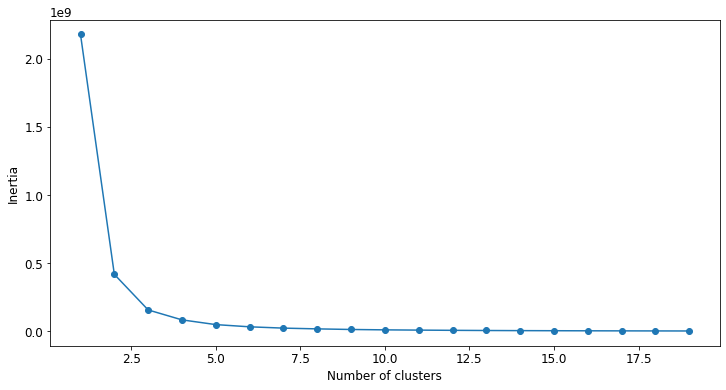

In [ ]:
# UNSCALED
# store inertia values into list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(random_state=12, n_clusters=cluster, init='k-means++', max_iter=400, tol=0.00001)
    kmeans.fit(ds_unsupervised)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting inertia values vs # of clusters
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [ ]:
# UNSCALED
# k means using OPTIMAL clusters and k-means++ initialization
kmeans = KMeans(random_state=10, n_clusters=5, init='k-means++', max_iter=400, tol=0.00001)
kmeans.fit(ds_unsupervised)
pred = kmeans.predict(ds_unsupervised)

In [ ]:
#value count of points in each of the clusters
frame = pd.DataFrame(ds_unsupervised)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    461771
2    113419
4     50164
3     38157
1     24260
Name: cluster, dtype: int64

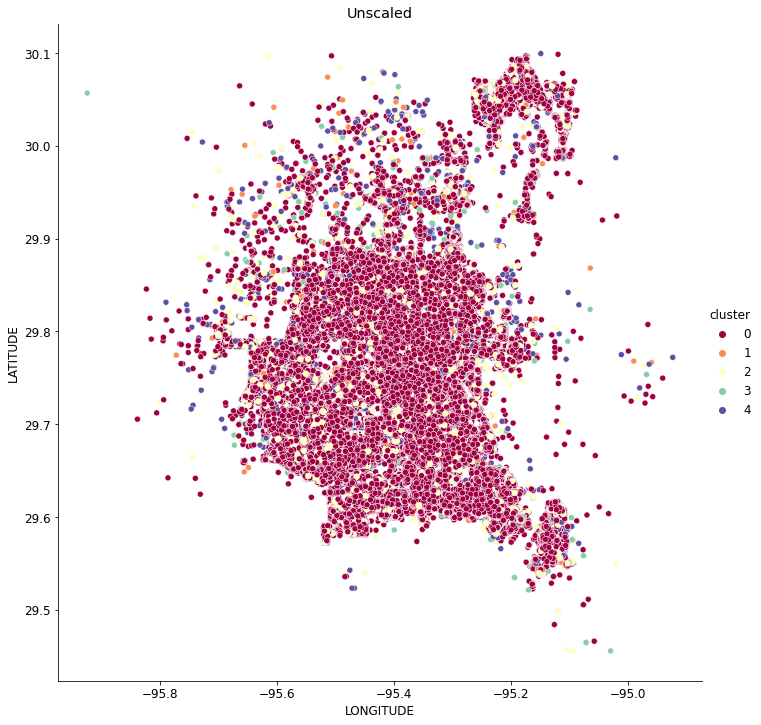

In [ ]:
#scatter plot that shows the geographic distribution of the clusters
sns.relplot(x="LONGITUDE", y="LATITUDE", hue="cluster", data=frame, height=10, palette="Spectral").set(title='Unscaled')

In [ ]:
kmeans_scaled = KMeans(n_clusters=2, init='k-means++', tol=0.00001, max_iter=400)
# fitting the k means algorithm on scaled data
kmeans_scaled.fit(ds_scale)

KMeans(max_iter=400, n_clusters=2, tol=1e-05)

In [ ]:
kmeans_scaled.inertia_

1505128.9567462748

Text(0, 0.5, 'Inertia')

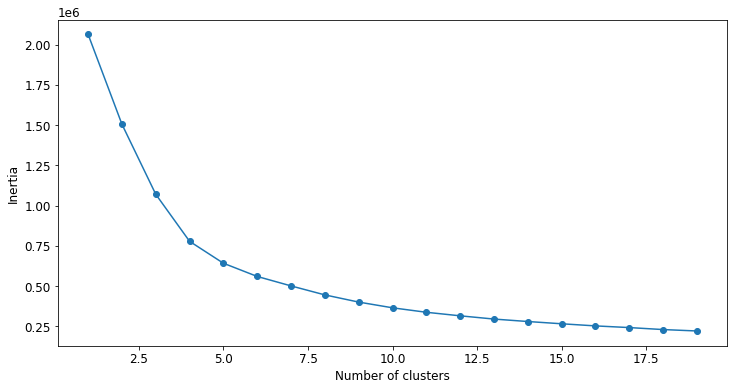

In [ ]:
# store inertia values into list
SSE = []
for cluster in range(1,20):
    kmeans_scaled = KMeans(random_state=12, n_clusters=cluster, init='k-means++', max_iter=400, tol=0.00001)
    kmeans_scaled.fit(ds_scale)
    SSE.append(kmeans_scaled.inertia_)

# converting the results into a dataframe and plotting inertia values vs # of clusters
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

The model is not able to group  the dataset into different clusters. To select the optimal number of clusters an elbow method will be implemented. The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k, and for each value of k calculate the sum of squared errors (SSE). Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.


In [ ]:
# SCALED
# k means using OPTIMAL clusters and k-means++ initialization
kmeans_scaled = KMeans(random_state=10, n_clusters=6, init='k-means++', max_iter=400, tol=0.00001)
kmeans_scaled.fit(ds_scale)
pred2 = kmeans_scaled.predict(ds_scale)

In [ ]:
#value count of points in each of the clusters
frame = pd.DataFrame(ds_scale)
frame['cluster'] = pred2
frame['cluster'].value_counts()

0    235477
5    159630
4    125927
2     90043
1     58774
3     17920
Name: cluster, dtype: int64

In [ ]:
frame

,0,1,2,cluster
0,0.300871,-0.553055,0.489311,4
1,-0.505398,-1.241232,-0.681719,5
2,0.202042,-1.696384,-0.618039,5
3,-0.541837,0.826679,0.256040,0
4,0.204709,-0.736277,1.028391,4
...,...,...,...,...
687766,-0.524595,0.085097,-0.735333,2
687767,-0.352001,-0.496460,-0.782121,5
687768,-0.533838,0.341667,-1.484876,2
687769,-0.553746,0.112892,0.274351,0


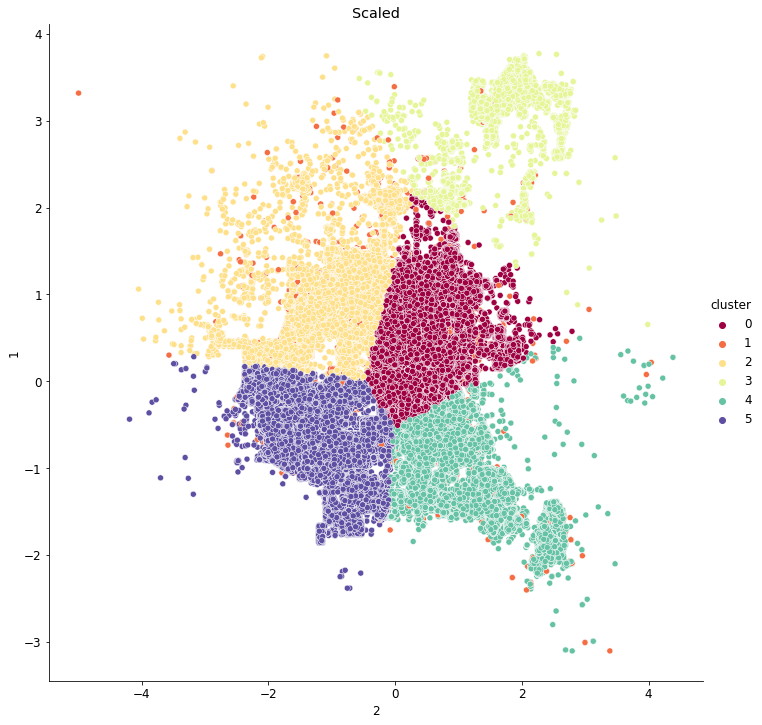

In [ ]:
#scatter plot that shows the geographic distribution of the clusters
sns.relplot(x=frame[2], y=frame[1], hue="cluster", data=frame, height=10, palette="Spectral").set(title='Scaled')